In [4]:
library(dplyr)
library(ggplot2)

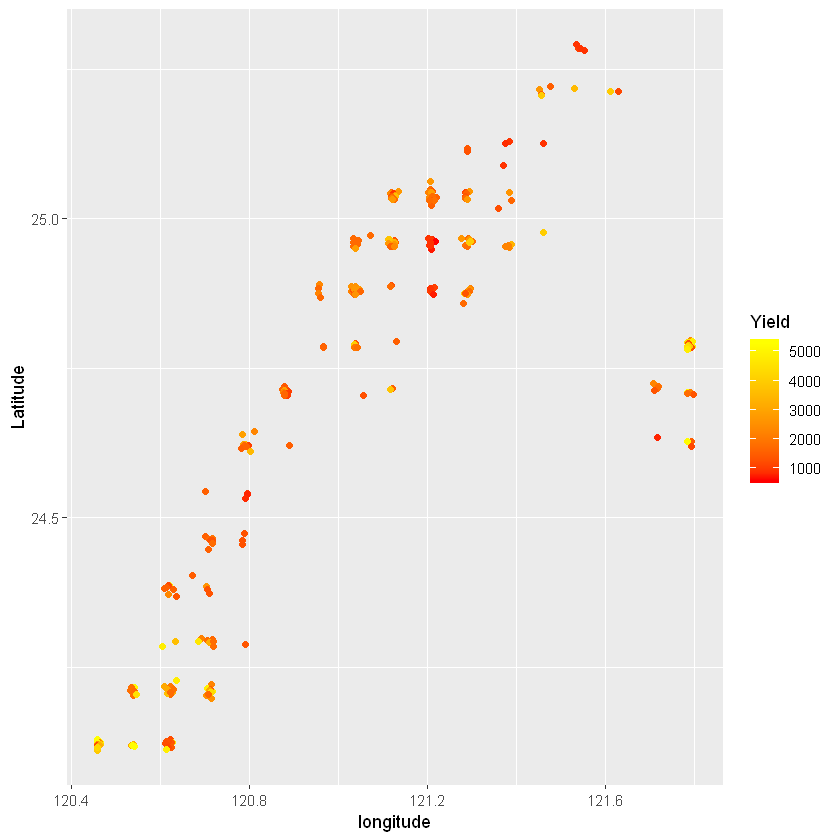

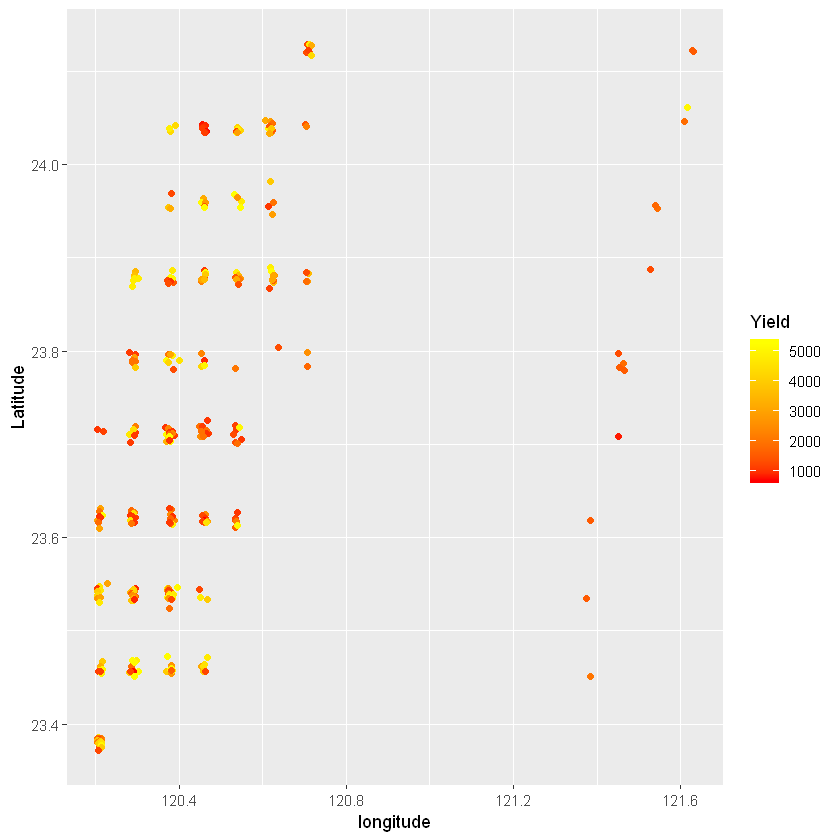

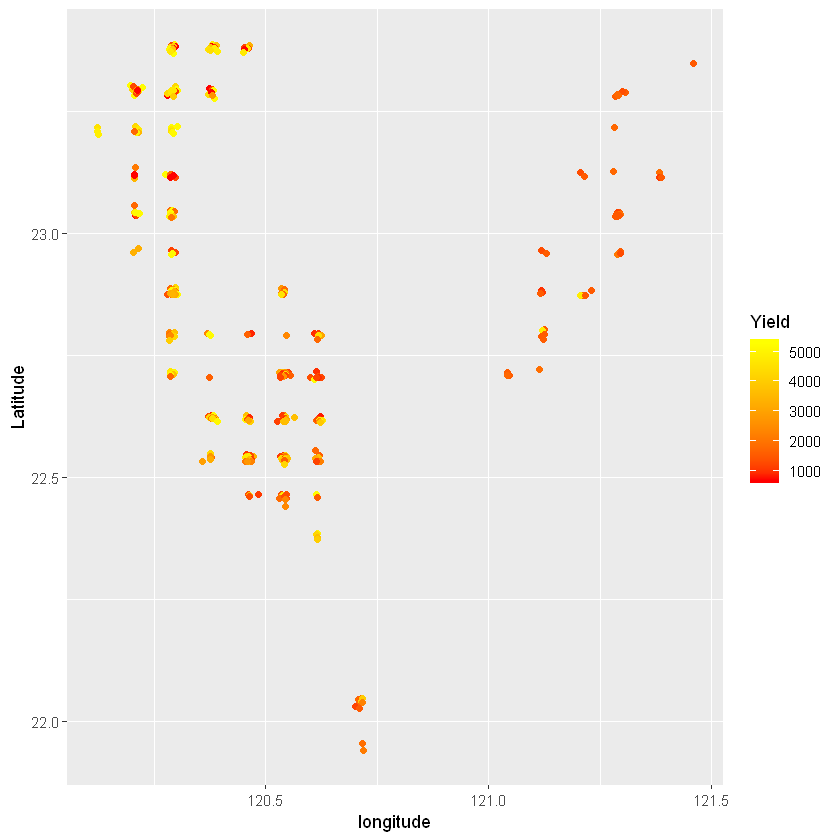

In [14]:
setwd("C:/Users/user/Desktop/1091/thesisdata") # desktop
final_0_50 = read.table("yield(grid)for 0-50.txt", header =T)
col = as.numeric(as.vector(final_0_50$yield))

ggplot(final_0_50, aes(x=lon,y=lat))+
  geom_point( aes(x=lon,y=lat, color = col))+
  scale_colour_gradient(low="red", high = "yellow",name ="Yield")+
  labs(x = "longitude", y = "Latitude")

# ===== for DH51-100 ====== #
final_51_100 = read.table("yield(grid)for 51-100.txt", header = T)
col = as.numeric(as.vector(final_51_100$yield))

ggplot(final_51_100, aes(x=lon,y=lat))+
  geom_point( aes(x=lon,y=lat, color = col))+
  scale_colour_gradient(low="red", high = "yellow",name ="Yield")+
  labs(x = "longitude", y = "Latitude")


# ===== for DH 101-154 ====== #

final_101_154 = read.table("yield(grid)for 101-154.txt", header = T)

col = as.numeric(as.vector(final_101_154$yield))

ggplot(final_101_154, aes(x=lon,y=lat))+
  geom_point( aes(x=lon,y=lat, color = col))+
  scale_colour_gradient(low="red", high = "yellow",name ="Yield")+
  labs(x = "longitude", y = "Latitude")



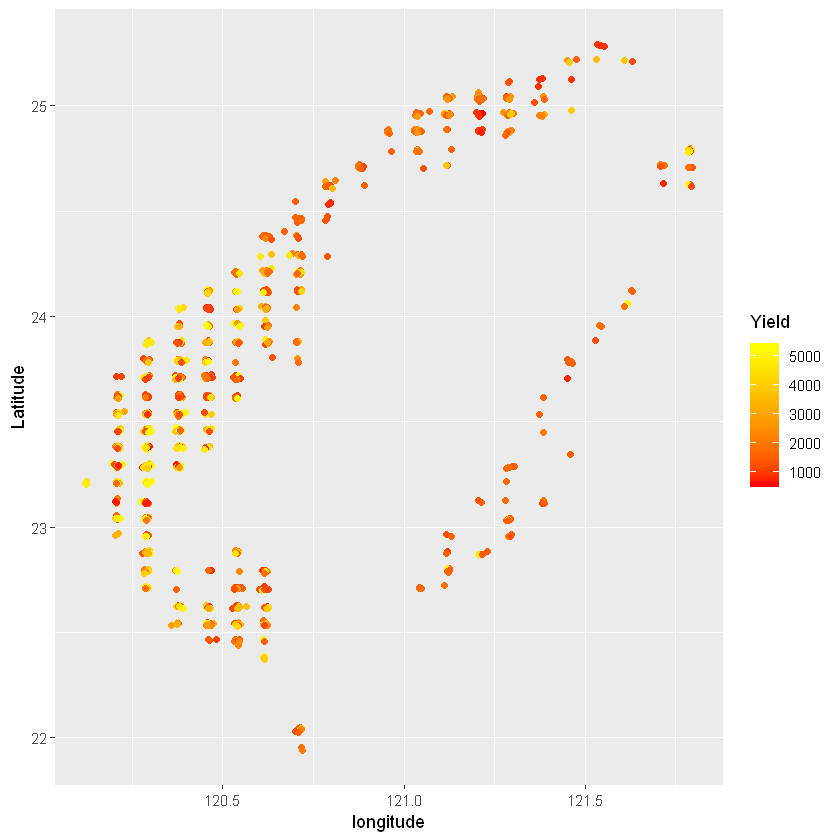

In [15]:
final_total = read.table(file="yield(grid all).txt",header = T)


col = as.numeric(as.vector(final_total$yield))

ggplot(final_total, aes(x=lon,y=lat))+
  geom_point( aes(x=lon,y=lat, color = col))+
  scale_colour_gradient(low="red", high = "yellow",name ="Yield")+
  labs(x = "longitude", y = "Latitude")


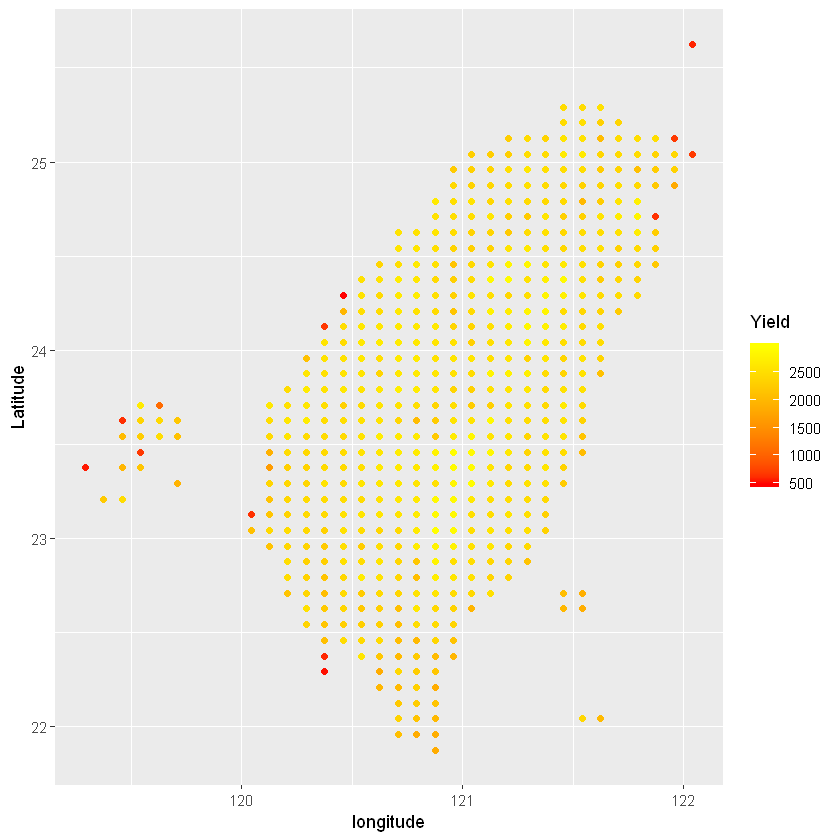

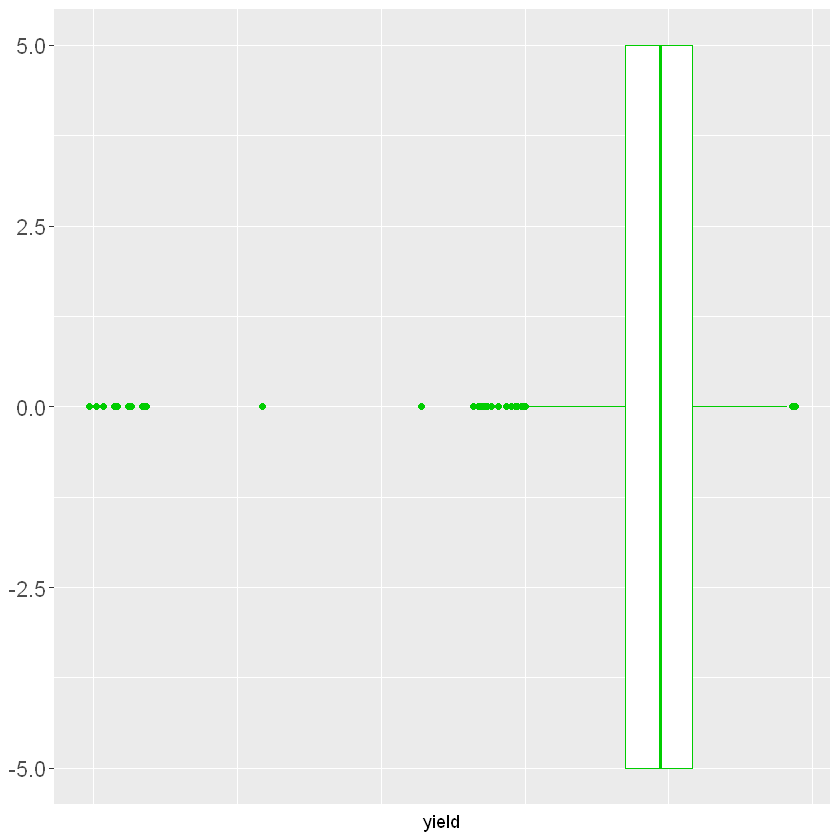

In [16]:
setwd("C:/Users/user/Desktop/1091/thesisdata") # desktop
final_Han546 = read.table("final_Han546.txt", header = T)

col = as.numeric(as.vector(final_Han546$yield))

# coord plot # 
ggplot(final_Han546, aes(x=Longitude,y=Latitude))+
  geom_point( aes(x=Longitude,y=Latitude, color = col))+
  scale_colour_gradient(low="red", high = "yellow",name ="Yield")+
  labs(x = "longitude", y = "Latitude")

# yield plot   # 1207待改 ## 
ggplot(final_Han546, aes(y = yield, group = 1))+
  geom_boxplot(color = 3, width = 10)+
  coord_flip()+
  theme(axis.ticks.x = element_blank(), 
        axis.text.x  = element_blank(),
        axis.text.y=element_text(size=13),
        axis.title.y = element_text(size=13,face="bold")) 

# =========== above are han154 plots =========== #

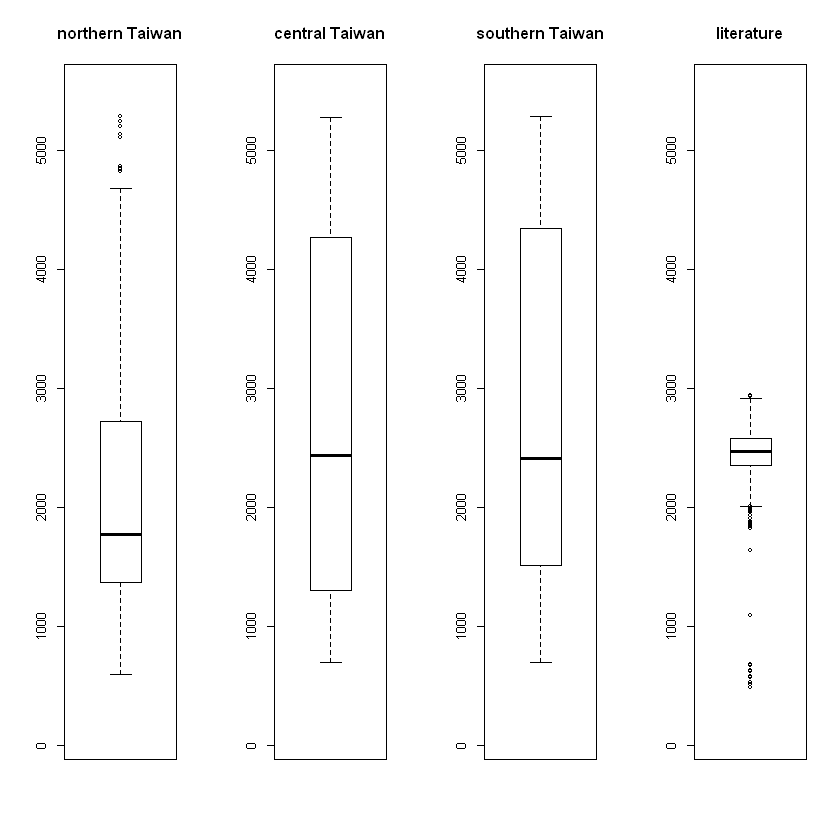

In [8]:
par(mfrow=c(1,4))

final_0_50$yield %>% boxplot(main = "northern Taiwan", ylim=c(100,5500))
final_51_100$yield %>% boxplot(main = "central Taiwan", ylim=c(100,5500))
final_101_154$yield %>% boxplot(main = "southern Taiwan", ylim=c(100,5500))
final_Han546$yield %>%  boxplot(main = "literature", ylim=c(100,5500))


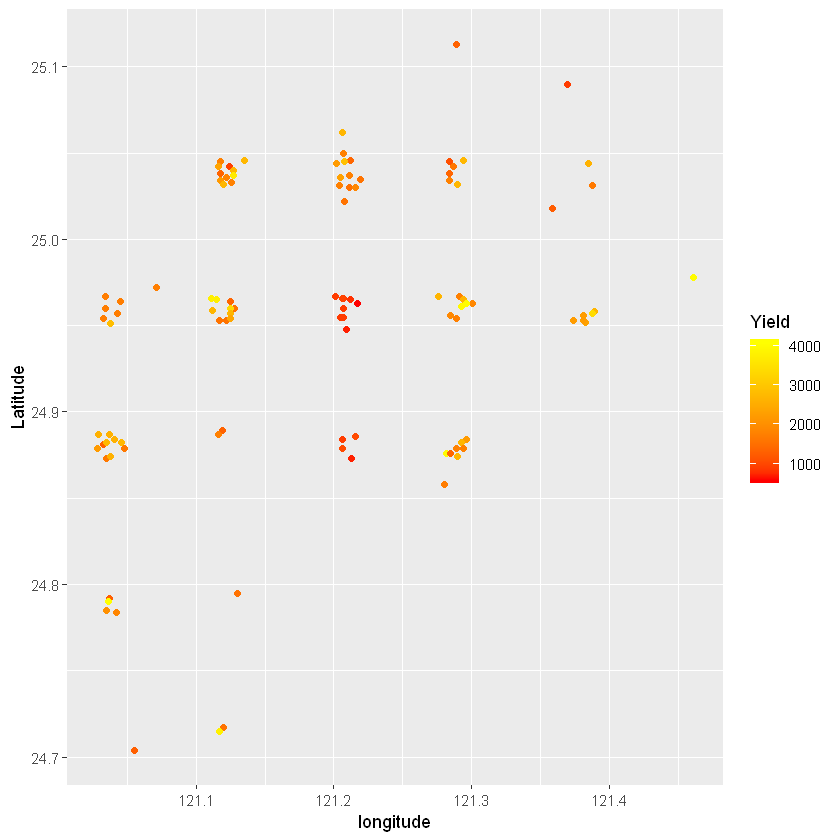

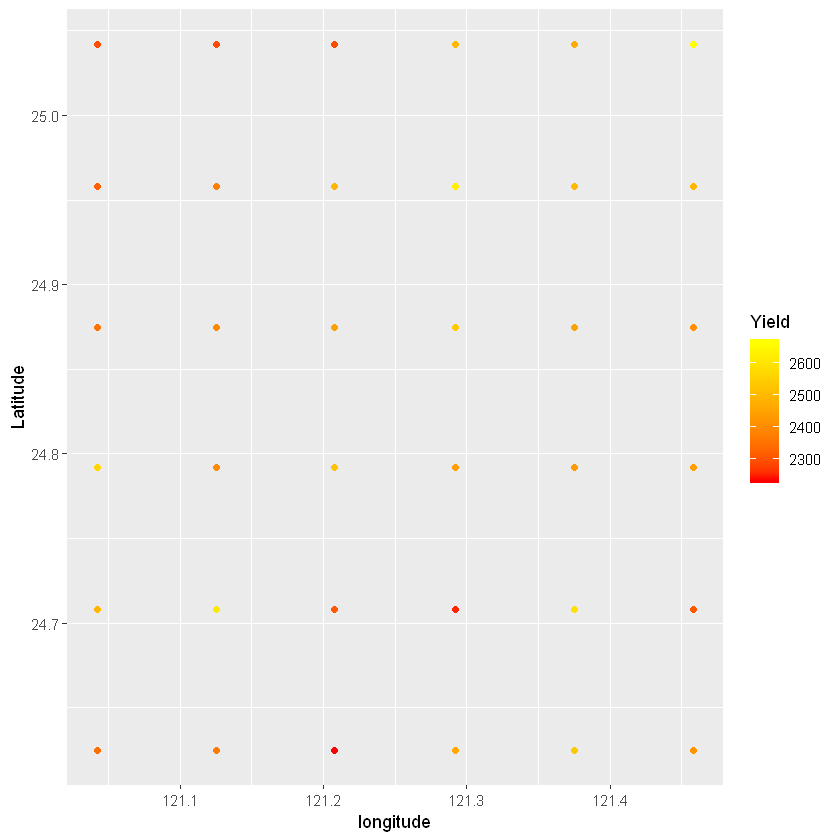

In [9]:
# ============== Taoyuan ============= #
# for DSM
TY = which(final_total$lat > 24.589 & final_total$lat < 25.116 
           & final_total$lon > 120.988 &  final_total$lon < 121.480)


TY_total = final_total[TY,]
col = as.numeric(as.vector(TY_total$yield))

ggplot(TY_total, aes(x=lon,y=lat))+
  geom_point( aes(x=lon,y=lat, color = col))+
  scale_colour_gradient(low="red", high = "yellow",name ="Yield")+
  labs(x = "longitude", y = "Latitude")

# for Han #
TY_Han = which(final_Han546$Latitude > 24.589 & final_Han546$Latitude < 25.116 
           & final_Han546$Longitude > 120.988 &  final_Han546$Longitude < 121.480)

TY_Han_total = final_Han546[TY_Han,]

col = as.numeric(as.vector(TY_Han_total$yield))

ggplot(TY_Han_total, aes(x=lon,y=lat))+
  geom_point( aes(x=Longitude,y=Latitude, color = col))+
  scale_colour_gradient(low="red", high = "yellow",name ="Yield")+
  labs(x = "longitude", y = "Latitude")



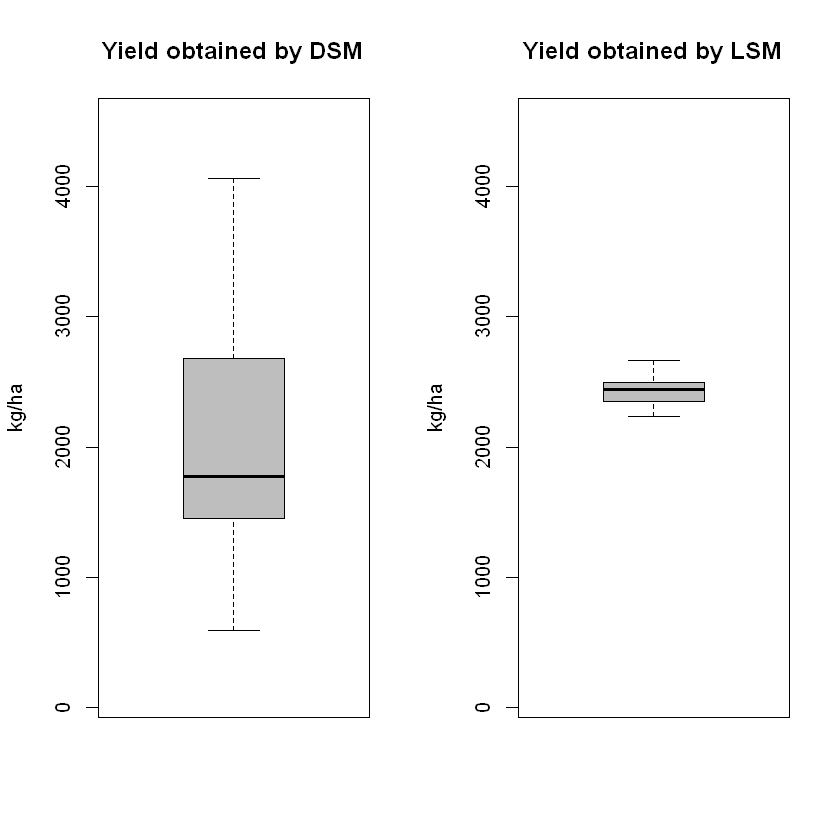


	F test to compare two variances

data:  TY_total$yield and TY_Han_total$yield
F = 60.398, num df = 106, denom df = 35, p-value < 2.2e-16
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
  33.63778 100.52080
sample estimates:
ratio of variances 
          60.39828 



	Welch Two Sample t-test

data:  TY_total$yield and TY_Han_total$yield
t = -4.8617, df = 115.84, p-value = 3.692e-06
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -575.9207 -242.4983
sample estimates:
mean of x mean of y 
 2024.374  2433.583 


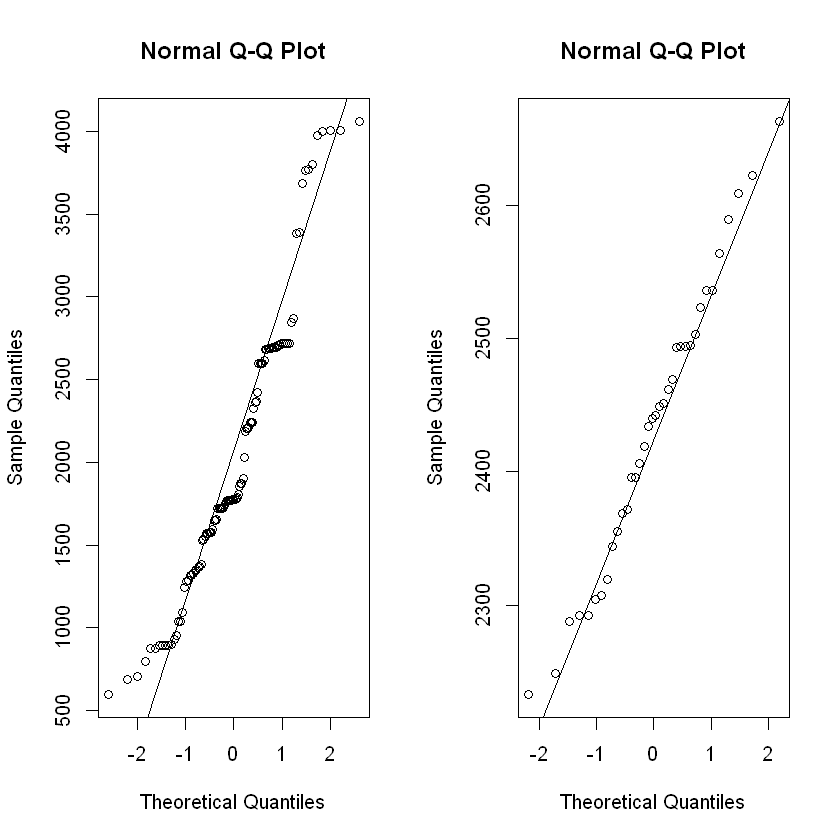

In [10]:
# boxplot #
par(mfrow=c(1,2))
boxplot(TY_total$yield,ylim=c(100,4500), ylab = "kg/ha"
        , main = "Yield obtained by DSM", col ="gray")
boxplot(TY_Han_total$yield,ylim=c(100,4500), ylab = "kg/ha"
        , main = "Yield obtained by LSM", col ="gray")

# Q-Q plot # 
par(mfrow=c(1,2))
qqnorm(TY_total$yield)
qqline(TY_total$yield)
qqnorm(TY_Han_total$yield)
qqline(TY_Han_total$yield)

# 變異數不同質 -> 顯示較精確描述土壤造成的影響
var.test(TY_total$yield,TY_Han_total$yield, alternative = "two.sided",
         conf.level = 0.95)
 
# 平均值有顯著差異
t.test(TY_total$yield,TY_Han_total$yield)


Reading layer `COUNTY_MOI_1090820' from data source `C:\Users\user\Desktop\1091\thesisdata\county\COUNTY_MOI_1090820.shp' using driver `ESRI Shapefile'
Simple feature collection with 22 features and 4 fields
geometry type:  MULTIPOLYGON
dimension:      XY
bbox:           xmin: 114.3593 ymin: 10.37135 xmax: 124.5611 ymax: 26.38528
geographic CRS: TWD97


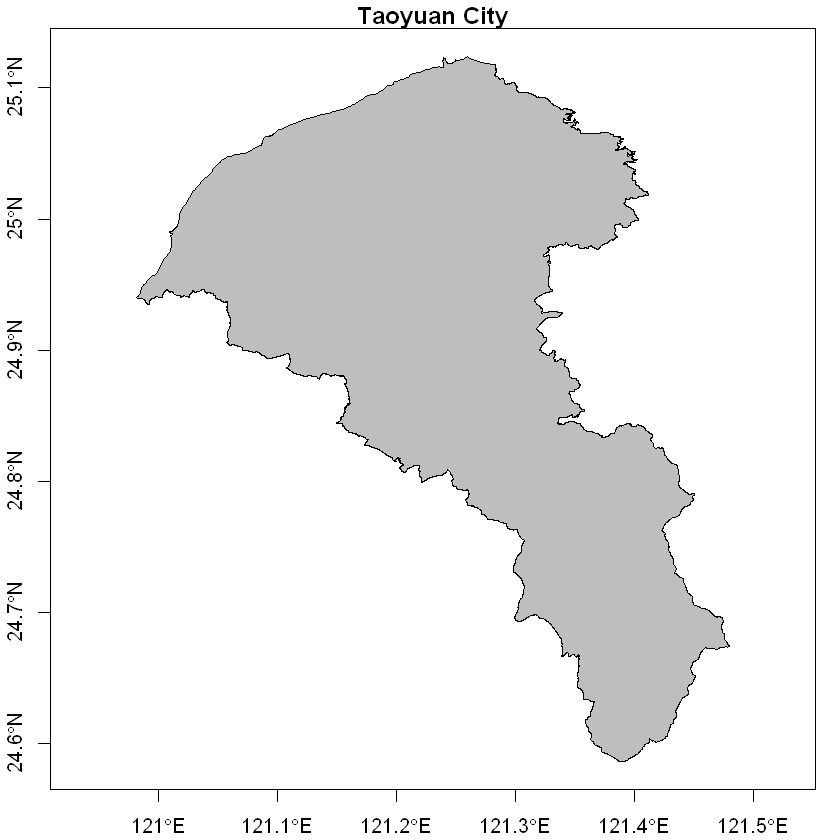

In [23]:
setwd("C:/Users/user/Desktop/1091/thesisdata/county") # desktop
county_sf = st_read("COUNTY_MOI_1090820.shp")

CTY = county_sf[county_sf$COUNTYNAME == "桃園市",] 
plot(CTY["COUNTYNAME"], main = "Taoyuan City",axes=T, col = "grey")
